![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 15 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import dask
import dask.dataframe as dd
import dask.array as da
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from dask_ml import preprocessing
from dask_ml.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from kneed import KneeLocator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN

In [2]:
# Aprovechamos la exploración inicial realizada en las tareas anteriores (Tasca Train_Test) para la presente Tasca ya que 
# continuamos trabajando con el dataset DelayedFlight.  

In [168]:
file=pd.read_csv("DelayedFlights.csv", sep=",", encoding='utf8')

In [169]:
file.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [170]:
file.describe().round(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.00,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758.00,...,1936758.00,1929648.00,1936303.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,3341651.15,2008.0,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,2184.26,...,765.69,6.81,18.23,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,2066064.96,0.0,3.48,8.78,2.00,450.49,424.77,548.18,464.63,1944.70,...,574.48,5.27,14.34,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,0.00,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1517452.50,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,610.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3242558.00,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,...,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,4972466.75,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3422.00,...,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,7009727.00,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,...,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


In [171]:
file.shape

(1936758, 30)

In [172]:
file.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [173]:
# A continuación, vemos que la columna 'Unnamed' no aporta nada, no es más que un contador de filas, así que pasaremos a 
# eliminarla. 

file['Unnamed: 0'].value_counts()

0          1
6846151    1
2232597    1
5967571    1
2242832    1
          ..
4495774    1
6925369    1
3917269    1
3919316    1
2047       1
Name: Unnamed: 0, Length: 1936758, dtype: int64

In [174]:
file.drop(['Unnamed: 0'], axis=1, inplace=True)

In [175]:
# Miramos los valores NaN que tienen las columnas

total_nan_values = file.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [176]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [12]:
# Pasamos a GRAFICAR: a través de la matriz de correlación podemos ver cómo algunas de las 29 variables del conjunto de datos 
# presentan multicolinealidad, es decir, pueden predecirse linealmente a partir de las demás.

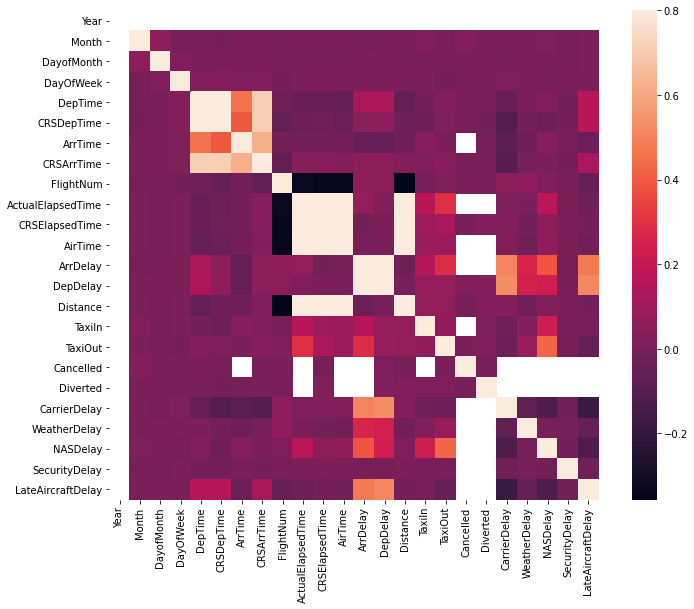

In [13]:
# Matriz de correlación  #

corrmat = file.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


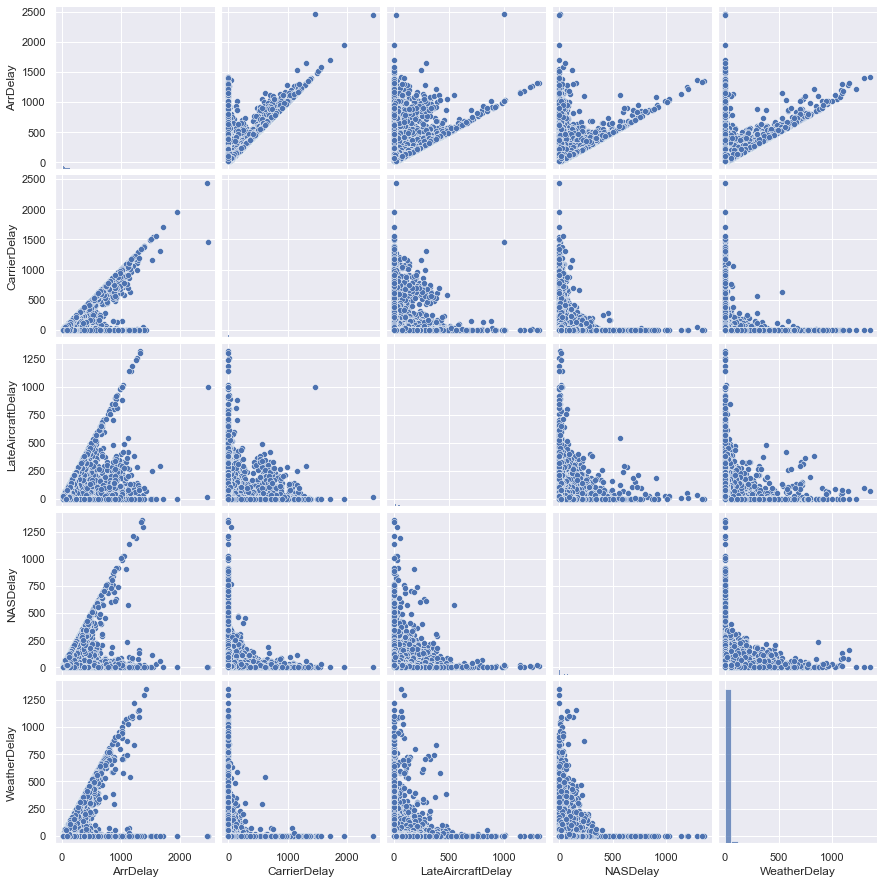

In [14]:
# Scatterplot #

# La matriz de correlación anterior indentifica las tres variables principales que generan los retrasos: Late Aircraft Delay, 
# Carrier Delay and NAS Delay. El scatterplot corrobora este supuesto, mostrando cómo esas tres variables crean la mayoría de 
# los retrasos durante el año.

# Antes de graficar, creamos la columna Status que representa si el vuela llegó en hora (0), con un poco retrasado (1), 
# con mucho retrasado (2), desviado (3) o cancelado (4)

for dataset in file:
    file.loc[file['ArrDelay'] <= 15, 'Status'] = 0
    file.loc[file['ArrDelay'] >= 15, 'Status'] = 1
    file.loc[file['ArrDelay'] >= 60, 'Status'] = 2
    file.loc[file['Diverted'] == 1, 'Status'] = 3
    file.loc[file['Cancelled'] == 1, 'Status'] = 4

sns.set()
Delayedflights = file[(file.Status >= 1) & (file.Status < 3)]
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

In [177]:
# Comprabamos las columnas que tienen valores NaN, ya que los modelos de regresión en python no aceptan estos valores.

total_nan_values = file.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [178]:
# De momento, reemplazamos los valores faltantes en ArrDelay por la media aritmética de la respectiva variable para evitar 
# pérdida de datos, ya que sabemos que seguro vamos a utilizar dicha variable. 

file['ArrDelay']=file['ArrDelay'].fillna(file['ArrDelay'].mean())

In [179]:
# Comprobamos que la variable ArrDelay ya no tiene valores NaN.

total_nan_values = file['ArrDelay'].isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
0


### <span style="color:black">Exercici 1.</span>

__Classifica els diferents vols utilitzant l'algorisme de K-means:__ <span style="color:blue">__[X] Fet__</span>

In [160]:
# Sustituimos los valors NaN de las featrures numéricas que vamos a utilizar por sus respectivas medias

file['ArrTime']=file['ArrTime'].fillna(file['ArrTime'].mean())
file['CarrierDelay']=file['CarrierDelay'].fillna(file['CarrierDelay'].mean())
file['WeatherDelay']=file['WeatherDelay'].fillna(file['WeatherDelay'].mean())
file['SecurityDelay']=file['SecurityDelay'].fillna(file['SecurityDelay'].mean())
file['NASDelay']=file['NASDelay'].fillna(file['NASDelay'].mean())
file['LateAircraftDelay']=file['LateAircraftDelay'].fillna(file['LateAircraftDelay'].mean())

In [161]:
# Creamos X (con prácticamente todas las features relevantes según la matrix de correlación) 

X= file[['Month', 'DayofMonth', 'DayOfWeek','UniqueCarrier','DepTime','DepDelay', 'ArrDelay', 'ArrTime','Distance', 
        'CarrierDelay', 'Cancelled', 'Diverted', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay']].copy() # features (características de cada vuelo)

In [162]:
# En X tenemos variables categóricas que debemos pasar a numéricas. De entrada aplicamos labelencoder, que etiquetará con 
# números cada uno de los datos categóricos

le = LabelEncoder()
  
X['UniqueCarrier']= le.fit_transform(X['UniqueCarrier'])
X['Cancelled']= le.fit_transform(X['Cancelled'])
X['Diverted']=le.fit_transform(X['Diverted'])

In [163]:
# Instanciamos objeto PCA y aplicamos para pasar de 16 a 3 dimensiones (¡IMPORTANTE!: no significa que seleccionemos variables
# del dataset inicial, significa que "comprimimos" los datos y eliminamos ruido del mismo).

pca=PCA(n_components=3) # Inicialmente probé con 12 componentes pero, como se verá en la próxima celda, con 11 es suficiente 
pca.fit(X) # obtenemos los componentes principales
X_pca=pca.transform(X) # convertimos nuestros datos con las nuevas dimensiones de PCA
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1936758, 16)
transformed shape: (1936758, 3)


In [164]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:3]))

# Vemos que con 3 componentes tenemos el 98% de varianza explicada. Inicialmente probé con n_components=12 cuando ejecuté 
# el PCA, pero con el sumatorio del resultado de la función explained_variance_ratio_ ya observé que con 3 era suficiente.

[0.44984631 0.38660655 0.15246874]
suma: 0.9889215909518577


In [165]:
# Una vez tenemos nuestro dataset más manejable, normalizamos los datos.

ss = StandardScaler()
X_scaled = ss.fit_transform(X_pca)
X_scaled

array([[-1.17012076,  0.47392276, -0.20561557],
       [ 1.46568061, -0.39546231,  0.85031894],
       [ 1.68555431, -1.01206856,  0.87068726],
       ...,
       [ 0.99786404, -0.46835826,  0.48320871],
       [ 0.32949401, -0.52990127,  0.40082054],
       [ 0.66027525, -0.00925558,  0.64538095]])

In [149]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42).fit(X_scaled)

In [150]:
kmeans.n_iter_ # Mínimo número de iteraciones para converger

10

In [151]:
kmeans.cluster_centers_ #Localización de los centroides de cada cluster (importante para poder graficar)

array([[ 1.55779772,  0.19892705, -3.79375629],
       [-0.75256319,  0.20325783, -0.04333013],
       [ 0.78760723, -0.29462905,  0.55865258]])

In [35]:
# A continuación vamos a elegir el número apropiado de clusters según el método Elbow. 

In [152]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300,"random_state": 42}

# La lista contiene los valores SSE (suma de errores al cuadrado) para cada k, es decir, para cada cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

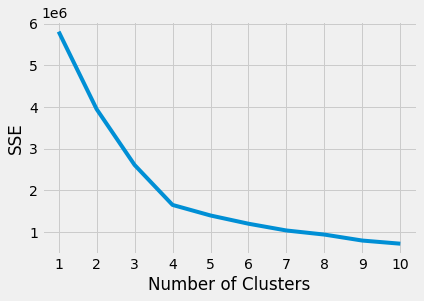

In [153]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [154]:
# Aunque se aprecia en el gráfico, vamos a printear el "codo": vemos que son 4 los clusters con los que ejecutaremos Kmeans

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [155]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42).fit(X_scaled)

In [39]:
kmeans.n_iter_ # Mínimo número de iteraciones para converger

11

In [66]:
print(kmeans.labels_)

[3 2 2 ... 2 2 2]


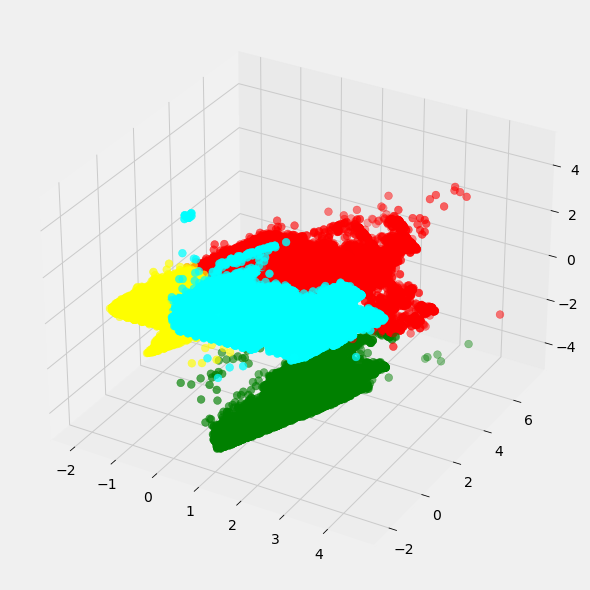

In [88]:
# Ahora veremos la clusterización realizada por kmeans en una gráfica 3D con colores para los grupos: por tanto, podemos afirmar
# que en base a las 16 variables seleccionadas encontramos 4 clusters bien diferenciados (las estrellas marcan 
# el centro de cada cluster, pero hay 2 millones de filas de datos y no se ven...).

# Prediciendo los clusters
labels = kmeans.predict(X_scaled)

# Obteniendo el centro de los clusters
C = kmeans.cluster_centers_
colores=['red','green','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

#Ploteamos
fig = plt.figure(figsize=(13,8))
ax = Axes3D(fig)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

### <span style="color:black">Exercici 2.</span>

__Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic:__ <span style="color:blue">__[X] Fet__</span>

In [180]:
# Para asegurarnos que no nos confundimos de variables, volvemos a cargar el dataset, eliminar filas, valores NaN, etc... 

file=pd.read_csv("DelayedFlights.csv", sep=",", encoding='utf8')
file.drop(['Unnamed: 0'], axis=1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [181]:
# Sustituimos los valors NaN de las featrures numéricas que vamos a utilizar por sus respectivas medias

file['ArrDelay']=file['ArrDelay'].fillna(file['ArrDelay'].mean())
file['ArrTime']=file['ArrTime'].fillna(file['ArrTime'].mean())
file['CarrierDelay']=file['CarrierDelay'].fillna(file['CarrierDelay'].mean())
file['WeatherDelay']=file['WeatherDelay'].fillna(file['WeatherDelay'].mean())
file['SecurityDelay']=file['SecurityDelay'].fillna(file['SecurityDelay'].mean())
file['NASDelay']=file['NASDelay'].fillna(file['NASDelay'].mean())
file['LateAircraftDelay']=file['LateAircraftDelay'].fillna(file['LateAircraftDelay'].mean())

In [182]:
# Pasamos las variables categóricas a numéricas con LabelEncoder.

le = preprocessing.LabelEncoder()
  
file['UniqueCarrier']= le.fit_transform(file['UniqueCarrier'])
file['Cancelled']= le.fit_transform(file['Cancelled'])
file['Diverted']=le.fit_transform(file['Diverted'])

In [183]:
# Creamos X (con prácticamente todas las features relevantes según la matrix de correlación que utilizamos en el ejercicio 1).

X= file[['Month', 'DayofMonth', 'DayOfWeek','UniqueCarrier','DepTime','DepDelay', 'ArrDelay', 'ArrTime','Distance', 
        'CarrierDelay', 'Cancelled', 'Diverted', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay']].copy() # features (características de cada vuelo)

In [184]:
X= X.sample(frac=0.01) #Por problemas de memoria, tengo que extraer un sample del 1% 

In [185]:
# Instanciamos objeto PCA con n_components=3 (ya lo sabemos del ejercicio 1) para reducir las dimensiones del dataset

pca=PCA(n_components=3)
pca.fit(X) 
X_pca=pca.transform(X) # convertimos nuestros datos con las nuevas dimensiones de PCA
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (19368, 16)
transformed shape: (19368, 3)


In [186]:
X_pca=X_pca.astype(np.float32) #convertimos los datos de float64 a float32 por problemas de memoria

In [187]:
# Continuamos trabajando con el array resultante del PCA, y estandarizamos los datos

scaled_features = StandardScaler().fit_transform(X_pca)

In [188]:
scaled_features=scaled_features.astype(np.float32)  #convertimos los datos de float64 a float32 por problemas de memoria

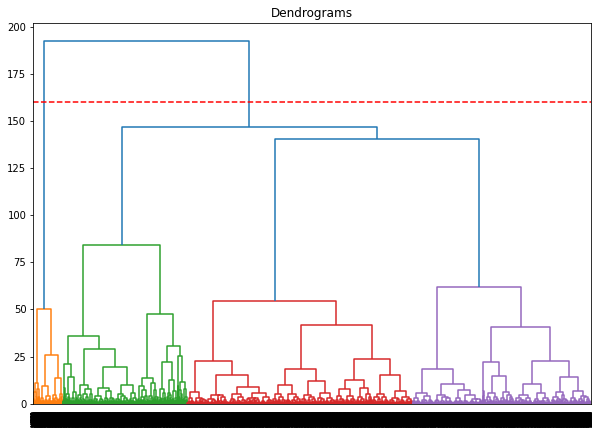

In [208]:
# A continuación pasamos a plotear el Dendograma para averiguar el n_clusters que asignaremos cuando ejecutemos el 
# AgglomerativeClustering. El eje x contiene las muestras y el eje y representa la distancia entre estas muestras. La línea 
# vertical con distancia máxima es la línea azul y por lo tanto podemos decidir un umbral de 160 y cortar el dendrograma, 
# con un resultado de n_clusters=2 para nuestro algoritmo AgglomerativeClustering:

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))
plt.axhline( y = 160, color = 'r' , linestyle = '--' )

In [201]:
# Ejecutamos nuestro algoritmos de clusterización jerárquica con n_clusters=2 según el resultado del Dendograma

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_cluster=cluster.fit_predict(scaled_features)
labels=cluster.labels_
print(labels)

[0 0 0 ... 0 0 0]


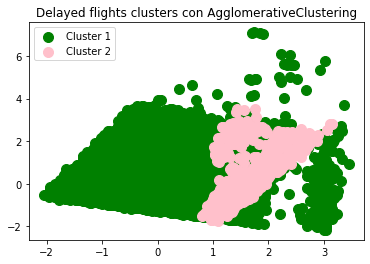

In [205]:
# Visualizamos nuestros dos clusters. 

X_=pd.DataFrame(scaled_features).values

plt.scatter(X_[y_cluster == 0, 0], X_[y_cluster == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X_[y_cluster == 1, 0], X_[y_cluster == 1, 1], s = 100, c = 'pink', label = 'Cluster 2')

plt.title('Delayed flights clusters con AgglomerativeClustering', size=12)
plt.legend()
plt.show()

### <span style="color:black">Exercici 3.</span>

__Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette:__ <span style="color:blue">__[X] Fet__</span>

In [10]:
# A continuación creamos una lista que va a recoger el silhouette_score del algoritmo Kmeans por un rango de clusters de
# 2 al 10, y seguidamente imprimiremos el silhouette score por cada uno de los valores de dicho rango.Como se observa en el 
# resultado, el mejor silhouette score es con 4 clusters, que fue el número de clusters aue definimos en nuestro Kmeans del 
# ejercicio 1. 

scores = []
range_values = np.arange(2, 10)
for i in range_values:
    # Entrenamos el modelo
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_, metric='euclidean', sample_size=len(X))
    print("Number of clusters =", i)
    print("Silhouette score =", score)
    scores.append(score)

Number of clusters = 2
Silhouette score = 0.3541355
Number of clusters = 3
Silhouette score = 0.39970958
Number of clusters = 4
Silhouette score = 0.43677518
Number of clusters = 5
Silhouette score = 0.3548598
Number of clusters = 6
Silhouette score = 0.35226303
Number of clusters = 7
Silhouette score = 0.36651507
Number of clusters = 8
Silhouette score = 0.3707101
Number of clusters = 9
Silhouette score = 0.37337595


In [ ]:
# Seguimos trabajando con estos datos, y lo que vamos a hacer a continuación es comparar el rendimiento de 3 algoritmos de 
# clustering (Kmeans, AgglomerativeClustering y DBScan) con silhouette_score para ver cúal de ellos es el que tiene un mejor
# rendimiento para la clusterización de dichos datos. Vamos a verlo. 

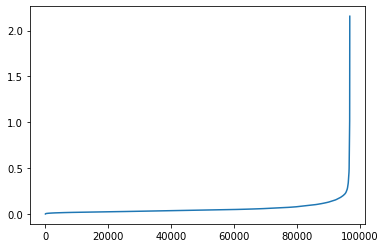

In [11]:
# En primer lugar, vamos a calcular el parámetro eps (máxima distancia que puede haber entre dos clusters) de nuestro DBSCAN 
# con el método elbow: según la curva resultante, podríamos decir que nuestro eps está sobre el 0.23 aproximadamente.

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(scaled_features)
minPts  = 5 # Fijamos el parámetro minPts
A = kneighbors_graph(scaled_features, minPts, include_self=False)
Ar = A.toarray()
seq = []
for i,s in enumerate(scaled_features):
    for j in range(len(scaled_features)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
seq.sort()
plt.plot(seq)
plt.show()

In [206]:
# Instanciamos los algoritmos k-means, dbscan y agglomerative
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.23)
agglomerative= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Ajustamos el algoritmo a nuestras scaled_features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)
agglomerative.fit(scaled_features)

# Calculamos el silhouette score para cada algoritmo
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)
agglomerative_silhouette = silhouette_score(scaled_features, agglomerative.labels_).round (2)

In [209]:
# Vemos que el algoritmo que nos da mejor rendimiento es AgglomerativeClustering.

print("Kmeans silhouette score: ", kmeans_silhouette)
print("Kmeans silhouette score: ", dbscan_silhouette)   
print("Kmeans silhouette score: ", agglomerative_silhouette)    

Kmeans silhouette score:  0.44
Kmeans silhouette score:  0.35
Kmeans silhouette score:  0.63
